In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import scipy

In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.1.0


In [5]:
Expressions={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}

In [6]:
from tensorflow.keras.backend import sigmoid

In [7]:
def swish(x, beta = 1):
  return (x * sigmoid(beta * x))

In [8]:
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.layers import Activation

In [9]:
get_custom_objects().update({'swish': Activation(swish)})

In [25]:
model_fer=tf.keras.models.load_model("C:\\Users\\pushkar\\Desktop\\fer2013\\fer2013_finalmodels\\model_fer_swish(updated_params).h5")
#model_kdef=tf.keras.models.load_model("C:\\Users\\pushkar\\Downloads\\model_dex_kd_bw.h5")

In [26]:
def detect_face(image):
    cascPath = 'haarcascade_frontalface_default.xml'
    faceCascade = cv2.CascadeClassifier(cascPath)
  #BGR to gray conversion
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #Cascade multiscale classifier
    detected_faces = faceCascade.detectMultiScale(image, minNeighbors=6,
                                                minSize=(100,100))
    sub = gray

    for x, y, w, h in detected_faces:
        sub = gray[y:y+h,x:x+w]
    return sub,detected_faces

In [27]:
# def make_prediction(frame):
#     frame1=cv2.resize(frame,(200,200))
#     #frame2=cv2.resize(frame,(48,48))
#    # plt.imshow(frame)
#     frame1=frame1/255.0
#     frame1=np.array(frame1).reshape(1,200,200,1)
    
# #     frame2=frame2/255.0
# #     frame2=np.array(frame2).reshape(1,48,48,1)
    
# #     predict2=model_fer.predict(frame2)
#     predict1=model_kdef.predict(frame1)
    
#     if(np.argmax(predict2)==4):
#         predict=np.argmax(predict2)
#     else:
#         predict=np.add(predict1,predict2)
#         predict=predict/2
#         predict=np.argmax(predict)
#     return predict

In [28]:
def make_prediction(frame):
    frame1=cv2.resize(frame,(48,48),interpolation = cv2.INTER_AREA)
   # plt.imshow(frame)
    frame1=frame1/255.0
    frame1=np.array(frame1).reshape(1,48,48,1)
    predict_arr=model_fer.predict(frame1)
    predict_max=np.argmax(predict_arr)
    prob = predict_arr[predict_max]
    return predict_arr,predict_max,prob

In [29]:
def face_in_video():
    cap=cv2.VideoCapture("mixed_emotions7.mp4")
    while True:
        ret,img=cap.read()
        if ret == False:
            break
        print('image',img.shape)
        x=img.shape[0]
        y=img.shape[1]
        y1=int(y/(x/300))
        print(y1)
        img2 = cv2.resize(img,(y1,300),interpolation = cv2.INTER_AREA)
        sub_faceog,detected_faces_og=detect_face(img)
        sub_face,detected_faces = detect_face(img2)
        res_array,res,prob=make_prediction(sub_face)
        res_array=np.squeeze(res_array)
        for x,y,w,h in detected_faces_og:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img,str(Expressions[res]),(x,y-5),font,0.5,(205,200,50),1,cv2.LINE_AA)
            
            cv2.putText(img,"Anger: "+str(round(res_array[0]*100,2))+"%",(5,20),font,0.5,(205,200,0),1,cv2.LINE_AA)
            cv2.rectangle(img,(150,10),(150+int(round(res_array[0]*200)),20),(255,0,0),thickness=cv2.FILLED)
            
            cv2.putText(img,"Disgust: "+str(round(res_array[1]*100,2))+"%",(5,50),font,0.5,(205,200,0),1,cv2.LINE_AA)
            cv2.rectangle(img,(150,40),(150+int(round(res_array[1]*200)),50),(255,0,0),thickness=cv2.FILLED)
            
            cv2.putText(img,"Fear: "+str(round(res_array[2]*100,2))+"%",(5,80),font,0.5,(205,200,0),1,cv2.LINE_AA)
            cv2.rectangle(img,(150,70),(150+int(round(res_array[2]*200)),80),(255,0,0),thickness=cv2.FILLED)
            
            cv2.putText(img,"Happy: "+str(round(res_array[3]*100,2))+"%",(5,110),font,0.5,(205,200,0),1,cv2.LINE_AA)
            cv2.rectangle(img,(150,100),(150+int(round(res_array[3]*200)),110),(255,0,0),thickness=cv2.FILLED)
            
            cv2.putText(img,"Neutral: "+str(round(res_array[6]*100,2))+"%",(5,140),font,0.5,(205,200,0),1,cv2.LINE_AA)
            cv2.rectangle(img,(150,130),(150+int(round(res_array[6]*200)),140),(255,0,0),thickness=cv2.FILLED)
            
            cv2.putText(img,"Sad: "+str(round(res_array[4]*100,2))+"%",(5,170),font,0.5,(205,200,0),1,cv2.LINE_AA)
            cv2.rectangle(img,(150,160),(150+int(round(res_array[4]*200)),170),(255,0,0),thickness=cv2.FILLED)
            
            cv2.putText(img,"Surprise: "+str(round(res_array[5]*100,2))+"%",(5,200),font,0.5,(205,200,0),1,cv2.LINE_AA)
            cv2.rectangle(img,(150,190),(150+int(round(res_array[5]*200)),200),(255,0,0),thickness=cv2.FILLED)
        cv2.imshow('img',img)
        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [30]:
face_in_video()

image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533


image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533


image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533
image (720, 1280, 3)
533


In [24]:
# img = cv2.imread('C:\\Users\\User\\Downloads\\person_d.jpg')
# make_prediction(img)

4

In [74]:
# def detect_face(image):
#     cascPath = 'haarcascade_frontalface_default.xml'
#     faceCascade = cv2.CascadeClassifier(cascPath)
#   #BGR to gray conversion
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#   #Cascade multiscale classifier
#     detected_faces = faceCascade.detectMultiScale(image,minNeighbors=3,
#                                                 minSize=(10,10))
#     sub = gray

#     for x, y, w, h in detected_faces:
#         sub = gray[y:y+h,x:x+w]
#     return sub,detected_faces

(384, 800, 3)
625


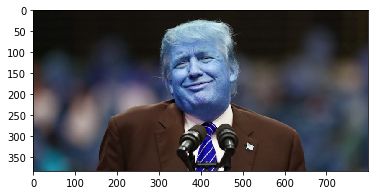

In [97]:
# img = cv2.imread('C:\\Users\\pushkar\\Downloads\\happy_trump3.jpg',1)
# print(img.shape)
# plt.imshow(img)
# x=img.shape[0]
# y=img.shape[1]
# y1=int(y/(x/300))
# print(y1)
# img2 = cv2.resize(img,(y1,300),interpolation = cv2.INTER_AREA)

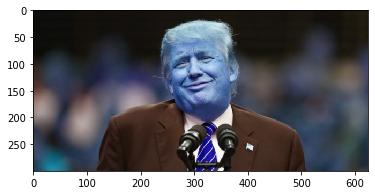

In [98]:
# plt.imshow(img2)

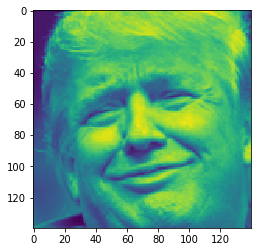

In [99]:
# sub,detected_faces=detect_face(img2)
# plt.imshow(sub)

In [100]:
# print(Expressions[make_prediction(sub)])

Happy
